# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [29]:
#Your code here
df = pd.read_csv("./multipleChoiceResponses_cleaned.csv", encoding='latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [4]:
df.columns     # To view ALL column names --  will need to loop the columns to view them as a list, OR consider viewing raw data in *.csv file.

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorTitle', 'JobFactorCompanyFunding', 'JobFactorImpact',
       'JobFactorRemote', 'JobFactorIndustry', 'JobFactorLeaderReputation',
       'JobFactorDiversity', 'JobFactorPublishingOpportunity', 'exchangeRate',
       'AdjustedCompensation'],
      dtype='object', length=230)

In [35]:
df.columns.values  # To view ALL column names --

array(['GenderSelect', 'Country', 'Age', 'EmploymentStatus',
       'StudentStatus', 'LearningDataScience', 'CodeWriter',
       'CareerSwitcher', 'CurrentJobTitleSelect', 'TitleFit',
       'CurrentEmployerType', 'MLToolNextYearSelect',
       'MLMethodNextYearSelect', 'LanguageRecommendationSelect',
       'PublicDatasetsSelect', 'LearningPlatformSelect',
       'LearningPlatformUsefulnessArxiv',
       'LearningPlatformUsefulnessBlogs',
       'LearningPlatformUsefulnessCollege',
       'LearningPlatformUsefulnessCompany',
       'LearningPlatformUsefulnessConferences',
       'LearningPlatformUsefulnessFriends',
       'LearningPlatformUsefulnessKaggle',
       'LearningPlatformUsefulnessNewsletters',
       'LearningPlatformUsefulnessCommunities',
       'LearningPlatformUsefulnessDocumentation',
       'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects',
       'LearningPlatformUsefulnessPodcasts',
       'LearningPlatformUsefulnessSO',
       'Learni

In [5]:
df.shape

(26394, 230)

In [6]:
df["AdjustedCompensation"].isnull()

0         True
1         True
2         True
3        False
4         True
5         True
6         True
7         True
8        False
9        False
10        True
11       False
12        True
13        True
14       False
15        True
16        True
17        True
18        True
19        True
20        True
21       False
22       False
23       False
24        True
25       False
26        True
27       False
28       False
29        True
         ...  
26364     True
26365     True
26366     True
26367     True
26368     True
26369     True
26370     True
26371     True
26372     True
26373     True
26374     True
26375     True
26376     True
26377     True
26378    False
26379     True
26380     True
26381     True
26382     True
26383     True
26384     True
26385     True
26386     True
26387     True
26388     True
26389     True
26390     True
26391     True
26392     True
26393     True
Name: AdjustedCompensation, Length: 26394, dtype: bool

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

In [7]:
import flatiron_stats as fs

In [8]:
#Your code here
#Subset the appropriate data into 2 groups
f1 = 'FormalEducation'
f2 = 'AdjustedCompensation'
f1c1 = "Master's degree"
f1c2 = "Bachelor's degree"
subset = df[(~df[f1].isnull()) & (~df[f2].isnull())]
s1_md = subset[subset[f1]==f1c1][f2]
s2_bd = subset[subset[f1]==f1c2][f2]

In [9]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4342 entries, 3 to 26378
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 7.7+ MB


In [10]:
subset.shape

(4342, 230)

In [11]:
f1

'FormalEducation'

In [12]:
f2

'AdjustedCompensation'

In [13]:
f1c1

"Master's degree"

In [14]:
f1c2

"Bachelor's degree"

In [15]:
subset

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0000
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,64184.8000
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,20882.4000
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015620,1483.9000
14,Male,Taiwan,26.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033304,36634.4000
21,Male,United States,25.0,Employed part-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,20000.0000
22,Male,United States,33.0,Employed full-time,NaN,NaN,Yes,NaN,Scientist/Researcher,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,100000.0000
23,Male,Czech Republic,21.0,Employed part-time,NaN,NaN,Yes,NaN,Other,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045820,916.4000
25,Male,Russia,22.0,Employed full-time,NaN,NaN,Yes,NaN,Data Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,10858.8480
27,Male,Colombia,34.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000342,53352.0000


In [16]:
s1_md.describe()

count    1.990000e+03
mean     6.913990e+04
std      1.355272e+05
min      0.000000e+00
25%      2.186800e+04
50%      5.381217e+04
75%      9.200000e+04
max      4.498900e+06
Name: AdjustedCompensation, dtype: float64

In [17]:
s2_bd.describe()

count    1.107000e+03
mean     6.488710e+04
std      3.069359e+05
min      0.000000e+00
25%      1.126620e+04
50%      3.839940e+04
75%      8.023100e+04
max      9.999999e+06
Name: AdjustedCompensation, dtype: float64

In [18]:
#Your code here
print('Comparison of {} for {} and {}'.format(f2, f1c1, f1c2))
print("Median Values: \ts1_md: {} \ts2_bd: {}".format(round(s1_md.median(),2), round(s2_bd.median(),2)))
print("Mean Values: \ts1_md: {} \ts2_bd: {}".format(round(s1_md.mean(),2), round(s2_bd.mean(),2)))
print('Sample sizes: \ts1_md: {} \ts2_bd: {}'.format(len(s1_md), len(s2_bd)))
print('Standard Deviation: \ts1_md: {} \ts2_bd: {}'.format(round(np.std(s1_md),2), round(np.std(s2_bd),2)))
print("Welch's t-test p-value:", fs.p_value_welch_ttest(s1_md, s2_bd))

Comparison of AdjustedCompensation for Master's degree and Bachelor's degree
Median Values: 	s1_md: 53812.17 	s2_bd: 38399.4
Mean Values: 	s1_md: 69139.9 	s2_bd: 64887.1
Sample sizes: 	s1_md: 1990 	s2_bd: 1107
Standard Deviation: 	s1_md: 135493.15 	s2_bd: 306797.21
Welch's t-test p-value: 0.33077639451272445


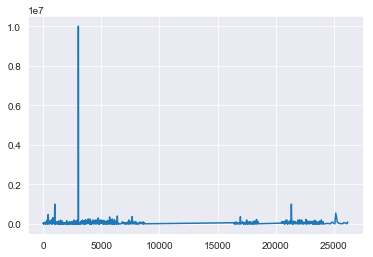

In [19]:
plt.plot(s2_bd, label="Compensation for Bachelor's degree");

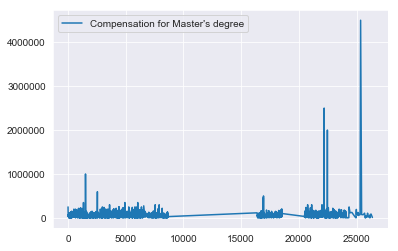

In [20]:
plt.plot(s1_md, label="Compensation for Master's degree")
plt.legend();

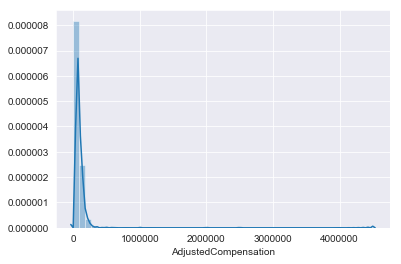

In [21]:
sns.distplot(s1_md);

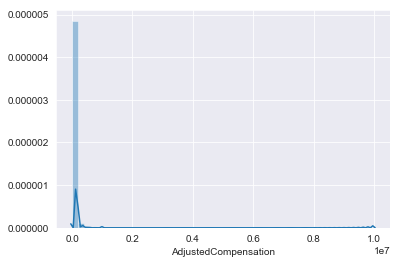

In [22]:
sns.distplot(s2_bd);

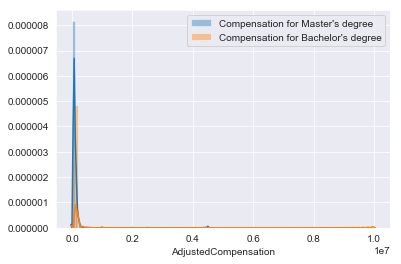

In [23]:
sns.distplot(s1_md, label="Compensation for Master's degree");
sns.distplot(s2_bd, label="Compensation for Bachelor's degree")
plt.legend();

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [36]:
f1 = 'FormalEducation'
f2 = 'AdjustedCompensation'
subset = df[(~df[f1].isnull()) & (~df[f2].isnull())]
s1 = subset[subset[f1]=="Doctoral degree"][f2]
s2 = subset[subset[f1]=="Bachelor's degree"][f2]
print("Median Values: \ns1:{} \ns2:{}".format(round(s1.median(),2), round(s2.median(),2)))
print('Sample sizes: \ns1: {} \ns2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value:", fs.p_value_welch_ttest(s1, s2))
print("Welch's t-test p-value:", stats.ttest_ind(s1, s2, equal_var=False))


# Repeated Test with Outliers Removed
print('\n\nRepeated Test with Outliers Removed:')
outlier_threshold = 500000
s1 = subset[(subset[f1]=="Doctoral degree") & (subset[f2]<=outlier_threshold)][f2]
s2 = subset[(subset[f1]=="Bachelor's degree") & (subset[f2]<=outlier_threshold)][f2]
print('Sample sizes: \ns1: {} \ns2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value with outliers removed:", fs.p_value_welch_ttest(s1, s2))

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.15682381994720251
Welch's t-test p-value: Ttest_indResult(statistic=1.0081234695549772, pvalue=0.31364763989440514)


Repeated Test with Outliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


In [25]:
0.31364763989440514/2

0.15682381994720257

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [26]:
#Your code here

In [27]:
#Perform ANOVA here
import statsmodels.api as sm
from statsmodels.formula.api import ols

# f1 = 'FormalEducation'   (C)
# f2 = 'AdjustedCompensation' (y-value)

formula = '{} ~ C({})'.format(f2, f1)
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!